# NLP Project: Sentiment Analysis for Mental Health
### Course: CS6120 - Natural Language Processing
### Student: Rajkesh Prakash Shetty


## Objective
The goal of this project is to develop a sentiment classification model that identifies the emotional status (e.g., Anxiety, Depression) of mental health-related statements using a TF-IDF + Logistic Regression pipeline.

We will evaluate the model using precision, recall, F1-score, and confusion matrix.



## Dataset
The dataset used is from Kaggle: [Sentiment Analysis for Mental Health](https://www.kaggle.com/datasets/suchintikasarkar/sentiment-analysis-for-mental-health). It contains labeled mental health-related text entries with emotional status annotations.


In [60]:
!pip install pandas scikit-learn

In [61]:
import pandas as pd

df = pd.read_csv("/content/Combined Data.csv")  # adjust filename if needed
df.head()

,Unnamed: 0,statement,status
0,0,oh my gosh,Anxiety
1,1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,3,I've shifted my focus to something else but I'...,Anxiety
4,4,"I'm restless and restless, it's been a month n...",Anxiety


In [62]:
df.tail()

,Unnamed: 0,statement,status
53038,53038,Nobody takes me seriously I’ve (24M) dealt wit...,Anxiety
53039,53039,"selfishness ""I don't feel very good, it's lik...",Anxiety
53040,53040,Is there any way to sleep better? I can't slee...,Anxiety
53041,53041,"Public speaking tips? Hi, all. I have to give ...",Anxiety
53042,53042,I have really bad door anxiety! It's not about...,Anxiety


In [63]:
import re
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [64]:
df = df.drop(columns=["Unnamed: 0"])

In [65]:
df.head()

,statement,status
0,oh my gosh,Anxiety
1,"trouble sleeping, confused mind, restless hear...",Anxiety
2,"All wrong, back off dear, forward doubt. Stay ...",Anxiety
3,I've shifted my focus to something else but I'...,Anxiety
4,"I'm restless and restless, it's been a month n...",Anxiety


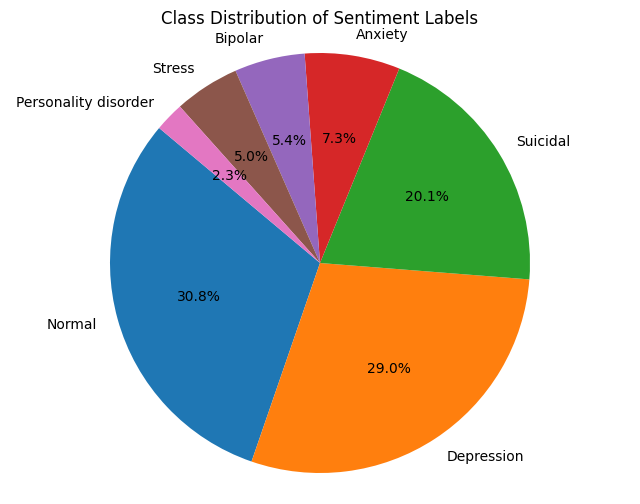

In [66]:
# Class distribution pie chart
category_counts = df["status"].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(
    category_counts, labels=category_counts.index, autopct="%1.1f%%", startangle=140
)
plt.title("Class Distribution of Sentiment Labels")
plt.axis("equal")
plt.show()

In [67]:
import nltk

nltk.download("stopwords")
nltk.download("wordnet")

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

stop_words = set(stopwords.words("english"))
lemmatizer = WordNetLemmatizer()


def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+|www\S+|mailto:\S+", "", text)
    text = re.sub(r"[^a-z\s]", "", text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [lemmatizer.lemmatize(word) for word in tokens]
    return " ".join(tokens)


df["cleaned"] = df["statement"].apply(clean_text)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [68]:
#  Encode labels
df["label"] = df["status"].astype("category").cat.codes
label_mapping = dict(enumerate(df["status"].astype("category").cat.categories))
print("Label mapping:", label_mapping)

Label mapping: {0: 'Anxiety', 1: 'Bipolar', 2: 'Depression', 3: 'Normal', 4: 'Personality disorder', 5: 'Stress', 6: 'Suicidal'}


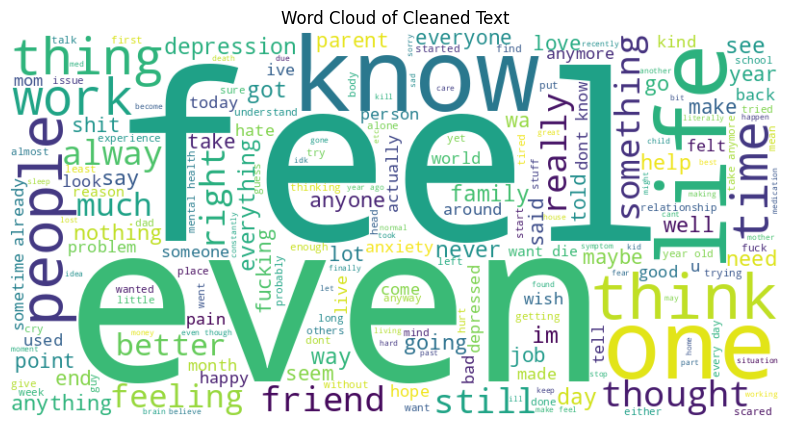

In [69]:
!pip install wordcloud
from wordcloud import WordCloud

# Generate word cloud from cleaned text
text = " ".join(df["cleaned"].tolist())
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Cleaned Text")
plt.show()

In [70]:
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
# Train-validation-test split
X_train, X_temp, y_train, y_temp = train_test_split(
    df["cleaned"], df["label"], test_size=0.3, random_state=42
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, test_size=0.5, random_state=42
)

In [73]:
pipeline = Pipeline(
    [("tfidf", TfidfVectorizer()), ("clf", LogisticRegression(max_iter=1000))]
)

# Hyperparameter Grid
param_grid = {
    "tfidf__max_features": [3000, 5000],
    "tfidf__ngram_range": [(1, 1), (1, 2)],
    "clf__C": [0.1, 1, 10],
    "clf__solver": ["lbfgs"],
}

In [74]:
#  Grid Search with Cross-Validation
grid = GridSearchCV(
    pipeline, param_grid, cv=3, scoring="accuracy", verbose=2, n_jobs=-1
)
import time

start = time.time()
grid.fit(X_train, y_train)
end = time.time()
print("Training time:", round(end - start, 2), "seconds")
print(" Best Parameters:", grid.best_params_)
print(" Best CV Accuracy:", grid.best_score_)

Fitting 3 folds for each of 12 candidates, totalling 36 fits
Training time: 274.07 seconds
 Best Parameters: {'clf__C': 1, 'clf__solver': 'lbfgs', 'tfidf__max_features': 3000, 'tfidf__ngram_range': (1, 2)}
 Best CV Accuracy: 0.7454617278014805


In [75]:
# # TF-IDF Vectorization
# tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))
# X_train_tfidf = tfidf.fit_transform(X_train)
# X_val_tfidf = tfidf.transform(X_val)
# X_test_tfidf = tfidf.transform(X_test)

In [76]:
# # Logistic Regression
# model = LogisticRegression(max_iter=1000)
# model.fit(X_train_tfidf, y_train)

In [77]:
# # Evaluation
# y_pred = model.predict(X_test_tfidf)

 Validation Set Performance:
                      precision    recall  f1-score   support

             Anxiety       0.82      0.75      0.79       587
             Bipolar       0.88      0.70      0.78       450
          Depression       0.70      0.72      0.71      2295
              Normal       0.85      0.96      0.90      2501
Personality disorder       0.58      0.49      0.54       190
              Stress       0.75      0.49      0.59       418
            Suicidal       0.67      0.64      0.65      1515

            accuracy                           0.76      7956
           macro avg       0.75      0.68      0.71      7956
        weighted avg       0.76      0.76      0.76      7956



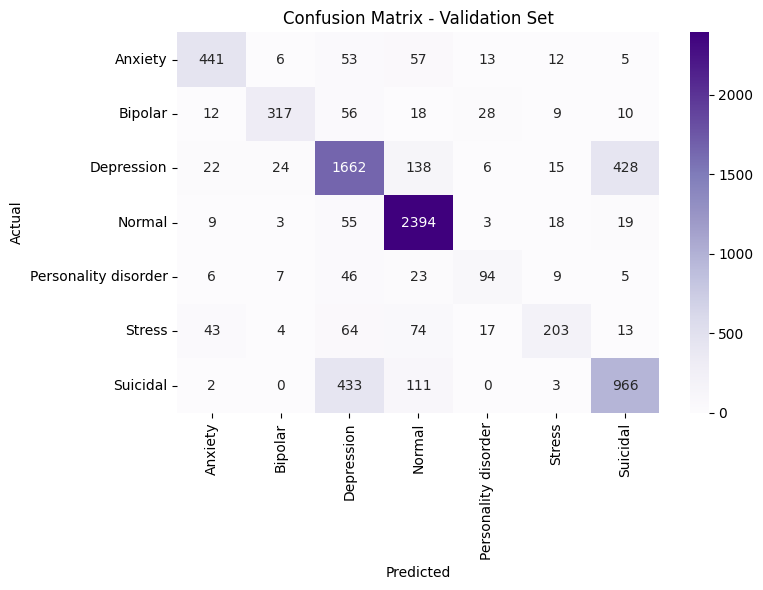

In [78]:
# Evaluation on validation set
y_val_pred = grid.best_estimator_.predict(X_val)
print(" Validation Set Performance:")
print(classification_report(y_val, y_val_pred, target_names=label_mapping.values()))

# Confusion matrix for validation
cm_val = confusion_matrix(y_val, y_val_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm_val,
    annot=True,
    fmt="d",
    cmap="Purples",
    xticklabels=[label_mapping[i] for i in sorted(label_mapping.keys())],
    yticklabels=[label_mapping[i] for i in sorted(label_mapping.keys())],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - Validation Set")
plt.tight_layout()
plt.show()

In [79]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(
    "\nClassification Report:\n",
    classification_report(y_test, y_pred, target_names=label_mapping.values()),
)


Classification Report:
                       precision    recall  f1-score   support

             Anxiety       0.79      0.75      0.77       570
             Bipolar       0.86      0.66      0.75       414
          Depression       0.69      0.71      0.70      2313
              Normal       0.85      0.96      0.90      2492
Personality disorder       0.63      0.56      0.59       180
              Stress       0.67      0.40      0.50       401
            Suicidal       0.66      0.63      0.64      1587

            accuracy                           0.75      7957
           macro avg       0.73      0.67      0.69      7957
        weighted avg       0.75      0.75      0.75      7957



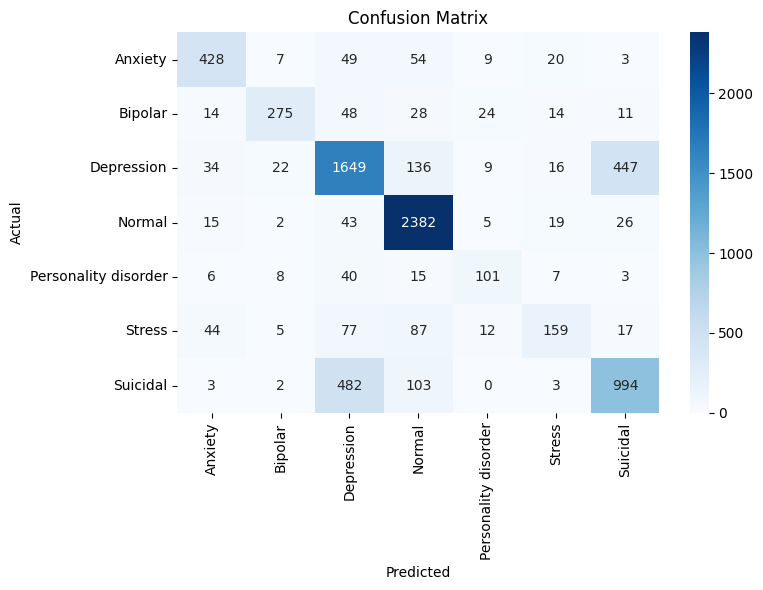

In [80]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=[label_mapping[i] for i in sorted(label_mapping.keys())],
    yticklabels=[label_mapping[i] for i in sorted(label_mapping.keys())],
)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

In [81]:
# Demo: Predict sentiment of a new statement
sample_text = "I feel so lost and disconnected from everyone around me."
cleaned_text = clean_text(sample_text)  # Use the same cleaning function
sample_tfidf = grid.best_estimator_.named_steps["tfidf"].transform([cleaned_text])
predicted_label = grid.best_estimator_.named_steps["clf"].predict(sample_tfidf)[0]

# Convert label back to string
label_name = label_mapping[predicted_label]
print(f" Input: {sample_text}")
print(f" Predicted Sentiment: {label_name}")

 Input: I feel so lost and disconnected from everyone around me.
 Predicted Sentiment: Depression



## Final Comparison with RoBERTa and LSTM

| Model                     | Accuracy | Pros                             | Cons                           |
|--------------------------|----------|----------------------------------|--------------------------------|
| TF-IDF + Logistic Reg.   | 75%     | Fast, interpretable, tunable     | Limited context understanding  |
| LSTM                     | %     | Sequence-aware, learns patterns  | Slower, needs padding, tuning |
| RoBERTa (Transformer)    | 83%     | SOTA(hyperparameter tuned), contextual embeddings      | Heavy, black-box               |

- RoBERTa offers best performance but at the cost of speed and interpretability.
- My model is lightweight, transparent, and still highly competitive.

Future work could explore ensembling.
